In [43]:
import pandas as pd
df = pd.read_table('spam.tsv')
df

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,160,8
5568,ham,Will ü b going to esplanade fr home?,36,1
5569,ham,"Pity, * was in mood for that. So...any other s...",57,7
5570,ham,The guy did some bitching but I acted like i'd...,125,1


In [44]:
x = df.iloc[:,1].values 
y = df.iloc[:,0].values 

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state =0)

In [47]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3900,)
(1672,)
(3900,)
(1672,)


In [48]:
# Pipeline = 4th step + 5th step
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
text_model = Pipeline([('tfidf',TfidfVectorizer()),
                       ('model',MultinomialNB())])

In [49]:
text_model.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('model',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [50]:
y_pred = text_model.predict(x_test)

In [51]:
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [52]:
y_test

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [53]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
accuracy_score(y_pred,y_test)*100

96.11244019138756

In [55]:
print(confusion_matrix(y_pred,y_test))

[[1451   65]
 [   0  156]]


In [56]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1516
        spam       0.71      1.00      0.83       156

    accuracy                           0.96      1672
   macro avg       0.85      0.98      0.90      1672
weighted avg       0.97      0.96      0.96      1672



>> **Same data Using Autoviml**

In [57]:
pip install autoviml

In [58]:
from google.colab import files
uploaded = files.upload()

Saving spam.tsv to spam (1).tsv


In [62]:
import pandas as pd
df = pd.read_table('spam.tsv',sep='\t')
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [63]:
from autoviml.Auto_NLP import Auto_NLP

# nlp_column = DataFrame
# train, test will also be dataframes
# target = label column
# score_type = balanced_accuracy

In [64]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df,test_size = 0.3,random_state = 0)

In [65]:
nlp_column = 'message'
target = 'label'

Auto NLP processing on NLP Column: message
Shape of Train Data: 3900 rows
    Shape of Test Data: 1672 rows
    Added 9 summary columns for counts of words and characters in each row
    Cleaning text in message before doing transformation...
Cleaning text in Train data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Train data = 0 seconds
        Time Taken for Processing text in Train data = 8 seconds
            Time Taken for Stopword removal in Train data = 1 seconds
    Cleaning text in message before doing transformation...
Cleaning text in Test data. This will take a long time for large >100K data sets...
    Time Taken for Expanding text in Test data = 0 seconds
        Time Taken for Processing text in Test data = 2 seconds
            Time Taken for Stopword removal in Test data = 1 seconds
Train and Test data Text cleaning completed. Time taken = 2 seconds
    A U T O - N L P   P R O C E S S I N G  O N   N L P   C O L U M N = me

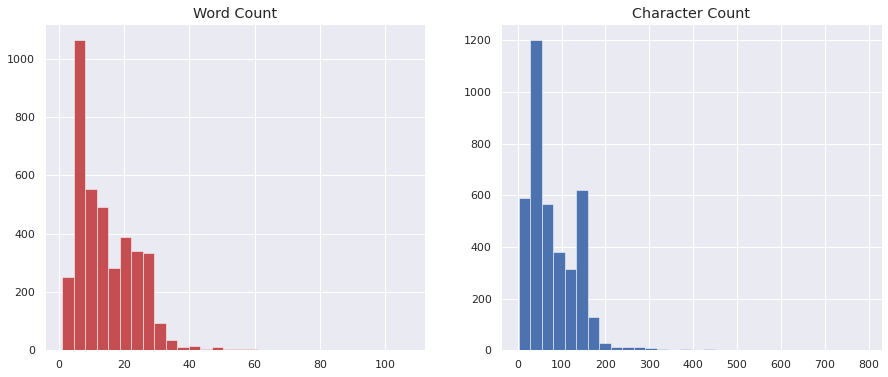

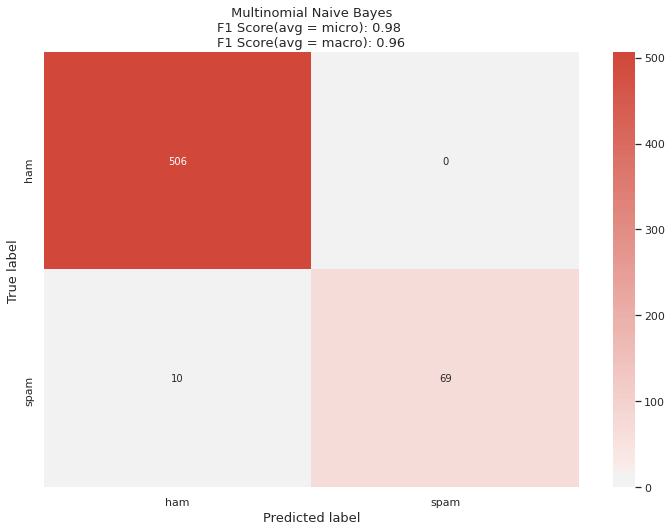

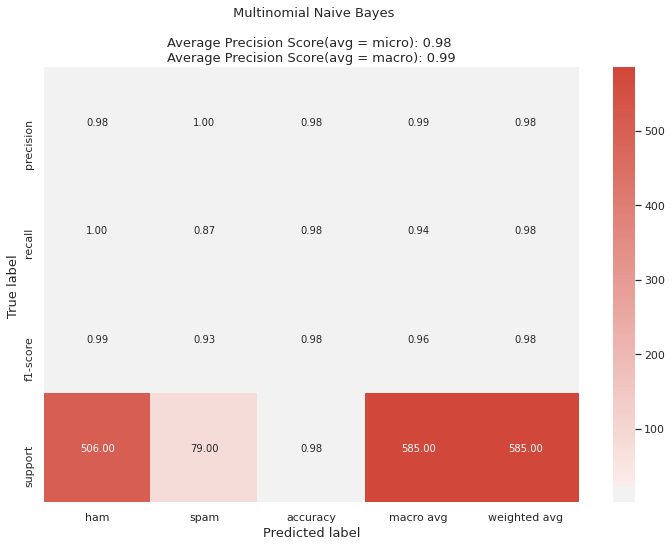

Training Pipeline on full Train data. This will take time...
Training completed. Time taken for Auto_NLP = 0.4 minutes
#########          A U T O   N L P  C O M P L E T E D    ###############################


In [66]:
train_nlp,test_nlp,my_pipeline,preds = Auto_NLP(nlp_column,train,test,target,
         score_type = 'balanced_accuracy',
         modeltype='Classification', 
         top_num_features=200, verbose=1, build_model=True)

In [67]:
my_pipeline

Pipeline(memory=None,
         steps=[('countvectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=0.05,
                                 max_features=8750, min_df=2,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents='unicode',
                                 token_pattern='\\w{1,}', tokenizer=None,
                                 vocabulary=None)),
                ('functiontransformer',
                 FunctionTransformer(accept_sparse=True, check_inverse=True,
                                     func=<function Auto_NLP.<locals>.<lambda> at 0x7eff99630d90>,
                                     inv_kw_args=None, inverse_func=None,
                                     k

In [68]:
y_pred = my_pipeline.predict(test[nlp_column])
y_pred

array(['ham', 'spam', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [69]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [70]:
accuracy_score(y_pred,y_test)*100

97.84688995215312

In [71]:
print(confusion_matrix(y_pred,y_test))

[[1439   24]
 [  12  197]]


In [72]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1463
        spam       0.89      0.94      0.92       209

    accuracy                           0.98      1672
   macro avg       0.94      0.96      0.95      1672
weighted avg       0.98      0.98      0.98      1672

